# K-Means Clustering


## Unsupervised Learning

In many applications, observations need to be divided into similar groups based on observed features. For example, retailers may want to divide potential customers into groups, in order to target a marketing campaign at the customers who are most likely to respond positively. This practice is known as _market segmentation_.

The general problem of grouping observations based on observed features is known as _clustering_ in machine learning. Like classification problems, clustering is about dividing observations into categories based on features. Unlike classification, we do not have true labels that specify what the categories should be; they have to be inferred from the data. In other words, with classification, the training data contains both features $X$ and labels $y$; with clustering, the training data only contains features $X$.

For this reason, clustering is an example of an _unsupervised learning_ problem, in contrast to the _supervised learning_ problems of regression and classification. This terminology comes from the following analogy to human learning.  Imagine a child that is trying to learn the difference between shapes and has several examples of each shape in front of them.

On the one hand, the child may be _supervised_ by an adult who gives the child feedback on each answer: "Yes, that is a circle....No, that was a square....No, that was actually a circle...."  This process is analogous to classification, where the labels in the training data can be used to provide "feedback" on how well the model is doing. Regression and classification are both examples of _supervised learning_ because labels are available in the training data.

On the other hand, the child may be _unsupervised_ and completely left to their own devices. Eventually, they may figure out that there is something similar about all of the circles that distinguish them from the squares. But they won't know that they are called "circles", nor will they know whether they are right or not. This is the fundamental challenge of unsupervised learning. Clustering is an example of _unsupervised learning_ because labels are not available in the training data.

We will practice clustering on a dataset containing measurements of 150 iris flowers, collected by the statistician R. A. Fisher.

In [1]:
import numpy as np
import pandas as pd

df_iris = pd.read_csv("https://dlsun.github.io/pods/data/iris.csv")
df_iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Let's focus on just two of the variables, the petal length and width, so that we can easily visualize the data. Based on the scatterplot below, how many clusters do you think there are in this data set? Can you devise an algorithm that would automatically identify those clusters?

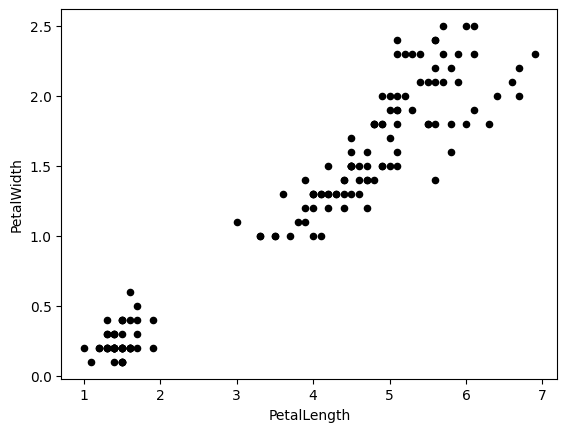

In [2]:
X_train = df_iris[["PetalLength", "PetalWidth"]]

X_train.plot.scatter(x="PetalLength", y="PetalWidth", color = "black");

## K-Means Clustering

$K$-means is an algorithm for finding $k$ clusters in data. The idea behind $k$-means is relatively simple: each of the $k$ clusters has a "center" point called the **centroid**, and each observation is associated with the cluster of its nearest centroid. The challenge is finding those centroids. Given a value of $k$, the $k$-means algorithm starts with a random guess for the $k$ centroids and iteratively improves them.

The steps are as follows:

1. Initialize $k$ centroids at random.
2. Assign each point to the cluster of its nearest centroid.
3. (After reassignment, each centroid may no longer be at the center of its cluster.) Recompute each centroid based on the points assigned to its cluster.
4. Repeat steps 2 and 3 until no points change clusters.


## Implementing K-Means from Scratch

First, we will implement the $k$-means algorithm from scratch. Let's try to cluster the iris data set into $k=2$ clusters. First, let's sample 2 points at random from the iris data to serve as the initial centroids.

,PetalLength,PetalWidth
blue,4.1,1.3
orange,1.5,0.1


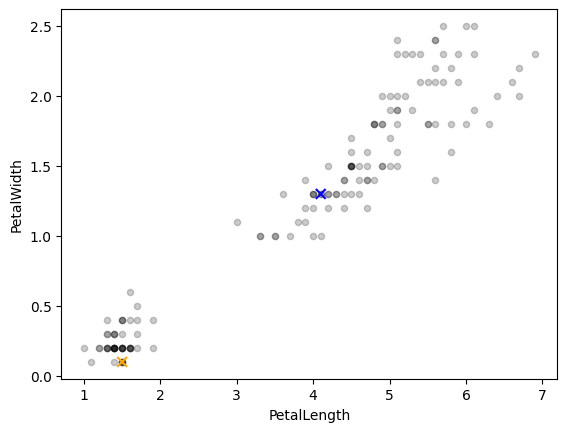

In [3]:
# Initialize 2 centroids at random from the data.
centroids = X_train.sample(2)

# Call the two clusters "blue" and "orange".
centroids.index = ["blue", "orange"]

# Plot these centroids as "X"s on the scatter plot
ax = X_train.plot.scatter(x="PetalLength", y="PetalWidth",
                          color="black", alpha=0.2)
centroids.plot.scatter(x="PetalLength", y="PetalWidth", marker="x", s = 50,
                       color=centroids.index, ax=ax)

centroids

Now we assign each point to the cluster of its nearest centroid.

In [4]:
# Finds the nearest centroid to a given observation.
def get_nearest_centroid(obs):
    dists = np.sqrt(((obs - centroids) ** 2).sum(axis=1))
    return dists.idxmin()

# Example: the cluster assignment of the first observation in the training data
get_nearest_centroid(X_train.loc[0])

'orange'

In [5]:
# Apply the function to the entire data set.
clusters = X_train.apply(get_nearest_centroid, axis=1)

clusters

0      orange
1      orange
2      orange
3      orange
4      orange
        ...  
145      blue
146      blue
147      blue
148      blue
149      blue
Length: 150, dtype: object

<Axes: xlabel='PetalLength', ylabel='PetalWidth'>

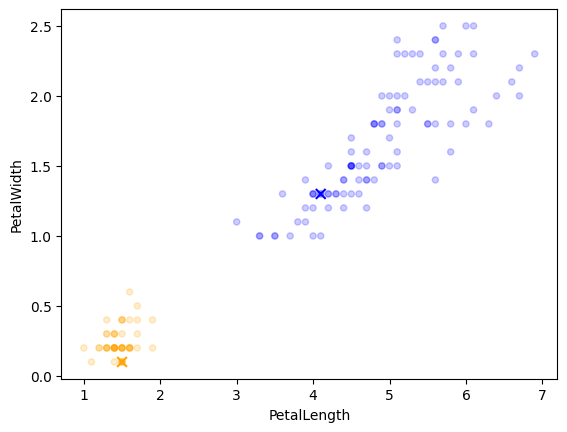

In [6]:
# Plot the cluster assignments.
ax = X_train.plot.scatter(x="PetalLength", y="PetalWidth",
                          color=clusters, alpha=0.2)
centroids.plot.scatter(x="PetalLength", y="PetalWidth", marker="x", s = 50,
                       color=centroids.index, ax=ax)

Notice that some of the centroids are no longer at the center of their clusters. We can fix that by redefining the centroid to be the mean of the points in its cluster.

,PetalLength,PetalWidth
blue,4.906,1.676
orange,1.464,0.244


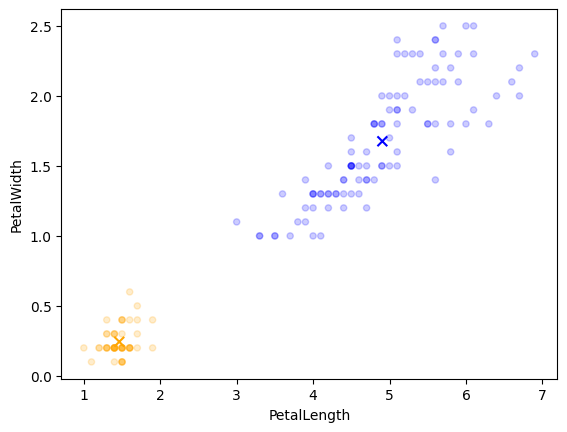

In [7]:
# Calculate the mean length and width for each cluster.
centroids = X_train.groupby(clusters).mean()

# Let's plot the new centroids.
ax = X_train.plot.scatter(x="PetalLength", y="PetalWidth",
                          c=clusters, alpha=0.2)
centroids.plot.scatter(x="PetalLength", y="PetalWidth", marker="x", s = 50,
                       c=centroids.index, ax=ax)

centroids

Now, there may be some points that are no longer assigned to their closest centroid, so we have to go back and re-assign clusters. But that may cause the centroids to no longer be at the center of their cluster, so we have to recalculate the centroids. And so on. This process continues until the cluster assignments stop changing.

<Axes: xlabel='PetalLength', ylabel='PetalWidth'>

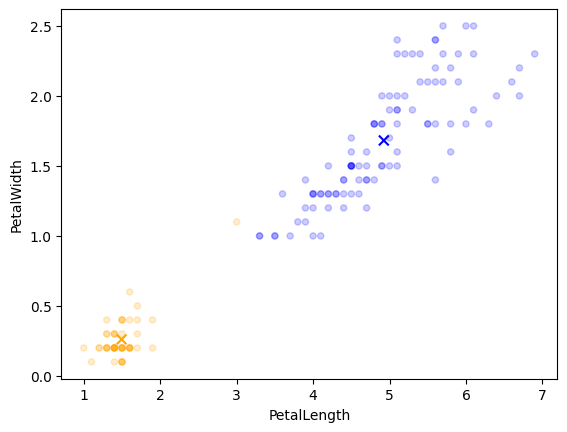

In [27]:
def get_nearest_centroid(obs):
    dists = np.sqrt(((obs - centroids) ** 2).sum(axis=1))
    return dists.idxmin()

# Assign points to their nearest centroid.
clusters = X_train.apply(get_nearest_centroid, axis=1)

# Recalculate the centroids based on the clusters.
centroids = X_train.groupby(clusters).mean()

# Plot the current cluster assignments and the centroids.
ax = X_train.plot.scatter(x="PetalLength", y="PetalWidth",
                          c=clusters, alpha=0.2)
centroids.plot.scatter(x="PetalLength", y="PetalWidth", marker="x", s = 50,
                       c=centroids.index, ax=ax)

Run the code in the above cell over and over until the clusters stop changing. This is the final cluster assignment.

It is not so easy to visualize the clusters when there are more than 2 features. But we can wrap the same algorithm inside a loop that continues until the cluster assignments do not change from one step to the next.

## K-Means in _scikit-learn_

We rarely need to implement the $k$-means algorithm from scratch because it is available in _scikit-learn_. The API for _scikit-learn_'s $k$-means model is similar to the API for supervised learning models, like $k$-nearest neighbors, except that the `.fit()` method only takes in `X`, not `X` and `y`. This makes sense because in unsupervised learning there are no true labels `y`.

In [28]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
model.fit(X_train)

/Users/ishaansathaye/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

Here are the final centroids.

In [29]:
# Extract the centroids and the clusters.
centroids = model.cluster_centers_

centroids

array([[1.49411765, 0.26078431],
       [4.92525253, 1.68181818]])

And here are the final cluster assignments for the training data. Note that the two clusters are labeled 0 and 1.

In [30]:
clusters = model.labels_

clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Let's plot the clusters. Notice that the result is the same as what we got from scratch.

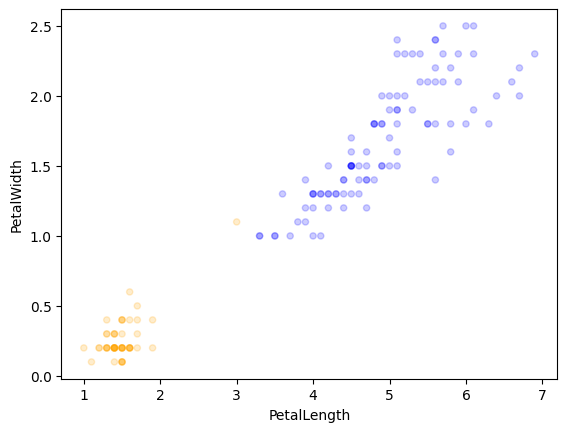

In [31]:
# Map the cluster numbers to colors.
clusters = pd.Series(clusters).map({
    0: "orange",
    1: "blue"
})

# Plot the current cluster assignments
X_train.plot.scatter(x="PetalLength", y="PetalWidth",
                     c=clusters, alpha=0.2);

We can call `model.predict()` to get the cluster assignment for a new observation. This will simply assign the new observation to the nearest cluster without recalculating the centroids. (If this observation had been in the training data, then assigning the new observation to a cluster would require recalculating the centroid, which would in turn require reassigning observations to clusters, and so on.)

For example, consider a flower whose petal has a length of 2.1 and a width of 0.6. It's obvious which cluster this point should be assigned to. Let's check that this is indeed the case, by calling `.predict()` on our fitted model.

In [32]:
model.predict([[2.1, 0.6]])

/Users/ishaansathaye/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

## A Note about Standardization

Note that we did not standardize the variables in the example above. Just as with $k$-nearest neighbors, it is generally a good idea to standardize your variables before applying $k$-means. Let's see how different the clusters would be if the variables had been standardized.

(Note: for ease of comparison to the previous plots, the variables in the plot below are not standardized, but the clusters are determined based on standardized values.)

/Users/ishaansathaye/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[ 0.65243918,  0.62756431],
       [-1.30487835, -1.25512862]])

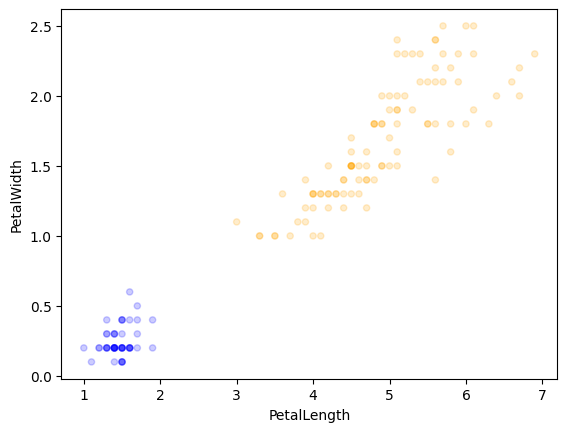

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)

model = KMeans(n_clusters=2)
model.fit(X_train_std)

clusters = pd.Series(model.labels_).map({
    0: "orange",
    1: "blue"
})

X_train.plot.scatter(x="PetalLength", y="PetalWidth",
                     c=clusters, alpha=0.2)

model.cluster_centers_

Compare these clusters to the ones we obtained from scratch above, keeping in mind that the coloring of the clusters is arbitrary. (All that matters is which observations are grouped together.) We see that only a handful observations near the boundary actually change cluster.  Standardization turns out not to matter much for the iris dataset because the variables are on fairly similar scales. But in data sets with variables on different scales, standardization is crucial.

## A different value of $k$

The $k$-means model above resulted in 2 clusters. Why 2? Because that's what we told it to do. In $k$-means clustering, the number of clusters must be specified in advance.

Might there be more than 2 clusters? Let's try again with $k=3$ clusters. Now we choose 3 points at random to be the initial centroids, assign each point to the cluster of its nearest centroid, and iterate the process from there. We'll let scikit-learn do the work for us. (To compare to what we did earlier we won't standardize, but remember that we generally do want to standardize the variables before clustering.)

In [34]:
model = KMeans(n_clusters=3)
model.fit(X_train)

/Users/ishaansathaye/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

Now there will be 3 centroids, corresponding to 3 clusters.

In [35]:
model.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.464     , 0.244     ],
       [4.26923077, 1.34230769]])

The clusters will be labeled 0, 1, 2. We can see which cluster each observation in the training data has been assigned to.

In [36]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Now we plot the points with their cluster assignment represented by (arbitrary) colors.

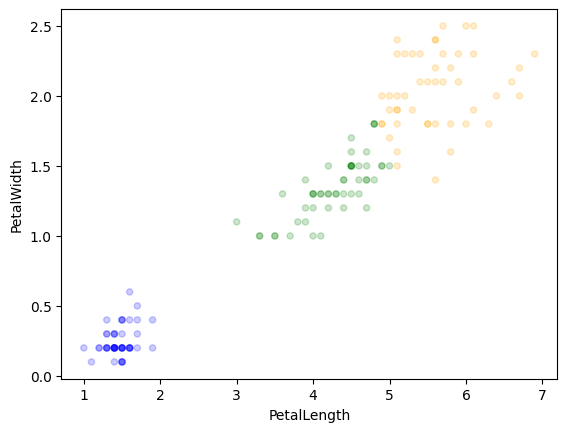

In [37]:
# Map the cluster numbers to colors.
clusters = pd.Series(model.labels_).map({
    0: "orange",
    1: "blue",
    2: "green"
})

# Plot the current cluster assignments
X_train.plot.scatter(x="PetalLength", y="PetalWidth",
                     c=clusters, alpha=0.2);

The cluster in the bottom left is basically the same as with $k=2$. (Remember, the colors are arbitrary; only the groups matter.) But the larger cluster in the $k=2$ model has now been split into two clusters when $k=3$. So which is it: 2 or 3 clusters, or maybe even more?

## How many clusters?

In general, we might have no way of knowing how many clusters there should be, or what they are. Remember, this is *unsupervised* learning, so there is no "y_train" that provides the "correct" cluster assignments. In practice, you can try several values of $k$ and look for the one that provides the most useful or interpretable solution in context. There is no single right answer, and any solution that exposes some interesting aspects of the data should be considered.


But for the iris data set, we actually do have an idea for what the clusters should be: the *species* (**Name**) of the flower - *setosa*, *virginica*, or *versicolor*. Here is the plot of the two features with species represented by color.

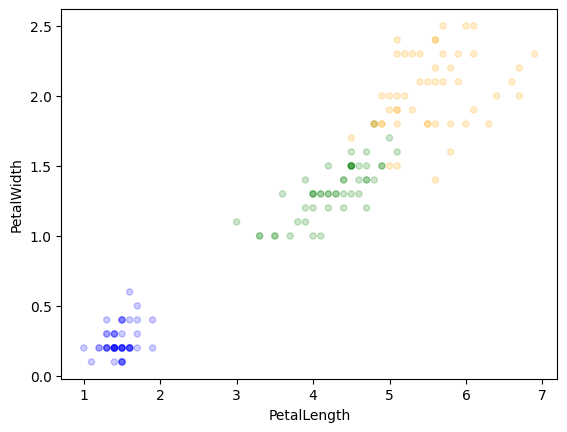

In [38]:
names = df_iris["Name"].map({
    "Iris-setosa": "blue",
    "Iris-versicolor": "green",
    "Iris-virginica": "orange"
})

X_train = df_iris[["PetalLength", "PetalWidth"]]
X_train.plot.scatter(x="PetalLength", y="PetalWidth",
                     c=names, alpha=0.2);

Compare with the results of the clustering algorithm; $k$-means clustering with $k=3$ clusters was able to identify the species of each flower pretty well *without using any information about species* in the model. The cluster assignment matched the species for most observations.

In [39]:
df_iris["cluster"] = clusters

pd.crosstab(df_iris["Name"], df_iris["cluster"])

cluster,blue,green,orange
Name,,,
Iris-setosa,50,0,0
Iris-versicolor,0,48,2
Iris-virginica,0,4,46


Also note that the cluster centroids are pretty close to the species means.

In [40]:
df_iris.groupby("Name")[["PetalLength", "PetalWidth"]].mean()

,PetalLength,PetalWidth
Name,,
Iris-setosa,1.464,0.244
Iris-versicolor,4.260,1.326
Iris-virginica,5.552,2.026


In [41]:
model.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.464     , 0.244     ],
       [4.26923077, 1.34230769]])